<a href="https://colab.research.google.com/github/LOGITHNATHAN/Multiple-Disease-Prediction/blob/main/Multiple_disease_prediction_system_indian_liver_patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_liver = pd.read_csv(r'/content/indian_liver_patient - indian_liver_patient.csv')


In [ ]:
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df_liver.shape

(583, 11)

In [ ]:
df_liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df_liver.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [ ]:
# Mean imputation
df_liver['Albumin_and_Globulin_Ratio'].fillna(df_liver['Albumin_and_Globulin_Ratio'].mean(), inplace=True)

/tmp/ipython-input-861727482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_liver['Albumin_and_Globulin_Ratio'].fillna(df_liver['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


In [ ]:
print(df_liver.sum())

Age                                                                       26087
Gender                        FemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMale...
Total_Bilirubin                                                          1923.2
Direct_Bilirubin                                                          866.4
Alkaline_Phosphotase                                                     169406
Alamine_Aminotransferase                                                  47056
Aspartate_Aminotransferase                                                64078
Total_Protiens                                                           3779.7
Albumin                                                                  1831.7
Albumin_and_Globulin_Ratio                                           552.138256
Dataset                                                                     750
dtype: object


Liver Disease Patients      : 416
Non Liver Disease Patients  : 167


/tmp/ipython-input-914093093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_liver, x='Dataset', palette='Set2')


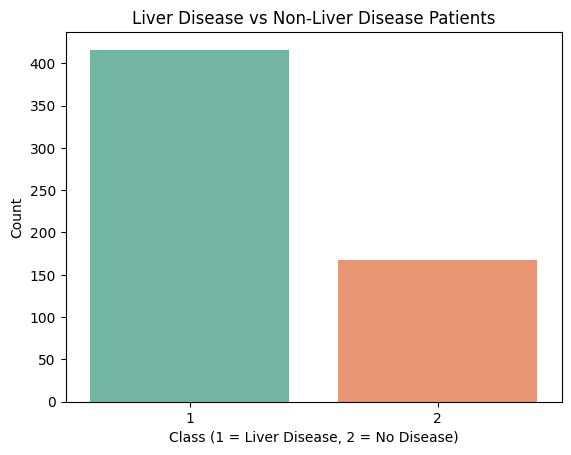

In [ ]:
# Target feature:
print("Liver Disease Patients      :", df_liver['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", df_liver['Dataset'].value_counts()[2])

# Visualization
sns.countplot(data=df_liver, x='Dataset', palette='Set2')
plt.title('Liver Disease vs Non-Liver Disease Patients')
plt.xlabel('Class (1 = Liver Disease, 2 = No Disease)')
plt.ylabel('Count')
plt.show()

In [ ]:
df_liver['Dataset'].value_counts()

,count
Dataset,
1,416
2,167


In [ ]:
# 1    416  # Liver disease patients
# 2    167  # Non Liver disease patients

In [ ]:
# 2. Map target labels: 1 → 0 (disease), 2 → 1 (no disease)
df_liver['Dataset'] = df_liver['Dataset'].map({1: 0, 2: 1})
df_liver['Dataset'].value_counts()

,count
Dataset,
0,416
1,167


Total Male   : 441
Total Female : 142


/tmp/ipython-input-179807301.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_liver, x='Gender', palette={'Male': 'skyblue', 'Female': 'pink'})


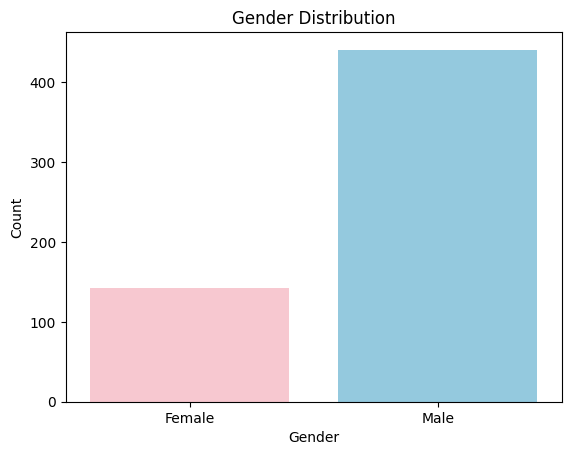

In [ ]:
# Gender feature count
print("Total Male   :", df_liver['Gender'].value_counts()['Male'])
print("Total Female :", df_liver['Gender'].value_counts()['Female'])

# Visualization
sns.countplot(data=df_liver, x='Gender', palette={'Male': 'skyblue', 'Female': 'pink'})
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# Clean gender values: strip spaces and convert to title case (e.g., 'male' → 'Male')
df_liver['Gender'] = df_liver['Gender'].astype(str).str.strip().str.title()

# Now apply label encoding
df_liver['Gender'] = df_liver['Gender'].map({'Male': 1, 'Female': 0})

# Check value counts
print("Encoded Gender Value Counts:")
print(df_liver['Gender'].value_counts(dropna=False))

Encoded Gender Value Counts:
Gender
1    441
0    142
Name: count, dtype: int64


In [ ]:
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


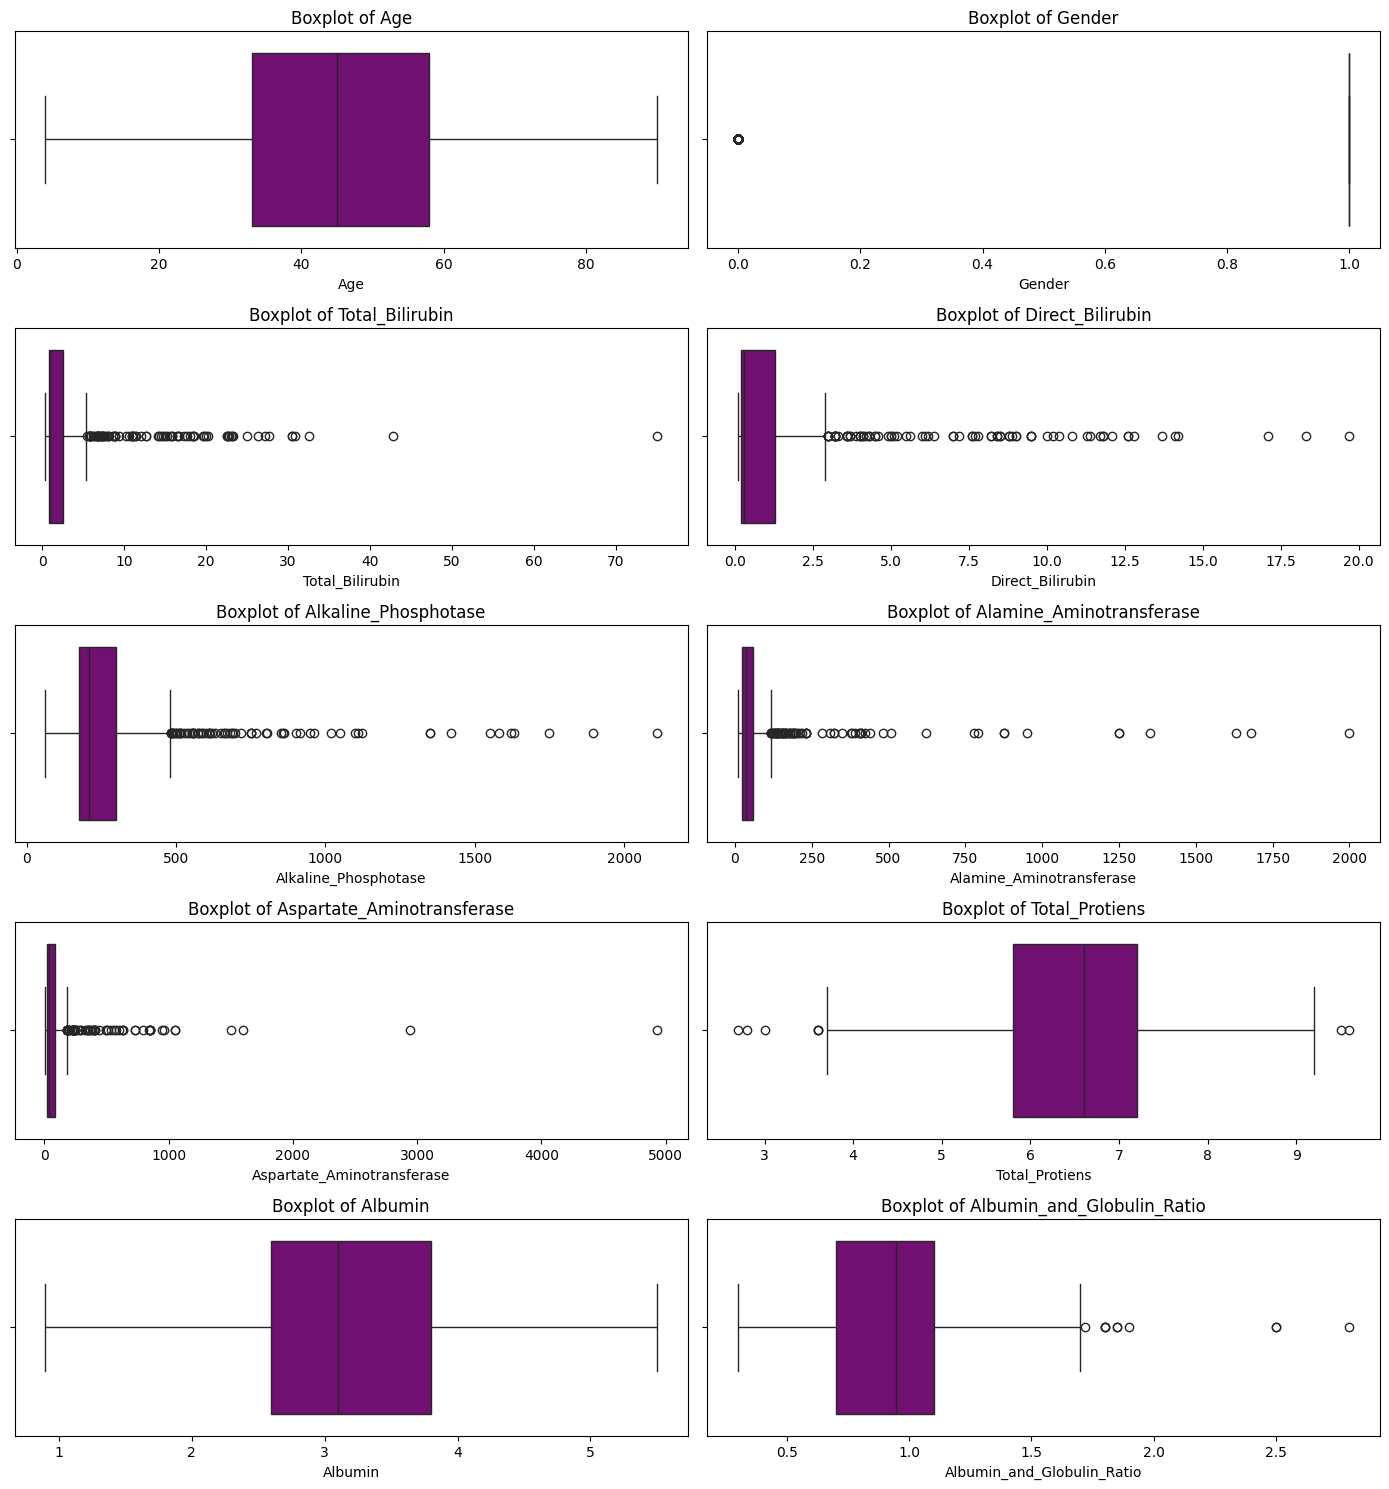

In [ ]:
# Filter numeric columns (excluding 'Dataset')
numeric_cols = [col for col in df_liver.columns if df_liver[col].dtype != 'object' and col != 'Dataset']

# Plot two boxplots per row
plt.figure(figsize=(14, 3 * ((len(numeric_cols) + 1) // 2)))  # Adjust height based on number of plots

for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 1) // 2, 2, i + 1)
    sns.boxplot(x=df_liver[col], color='purple')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = df_liver.Total_Bilirubin.quantile(0.75)-df_liver.Total_Bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = df_liver['Total_Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = df_liver['Total_Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

-4.6000000000000005
8.0


In [ ]:
count = df_liver[(df_liver['Total_Bilirubin'] > upper_bridge) | (df_liver['Total_Bilirubin'] < lower_bridge)].shape[0]
print(count)

57


In [ ]:
# if value greater than upper bridge, we replace that value with upper_bridge value:
df_liver.loc[df_liver['Total_Bilirubin'] >= upper_bridge, 'Total_Bilirubin'] = upper_bridge

In [ ]:
count = df_liver[(df_liver['Total_Bilirubin'] > upper_bridge) | (df_liver['Total_Bilirubin'] < lower_bridge)].shape[0]
print(count)

0


In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = df_liver.Direct_Bilirubin.quantile(0.75)-df_liver.Direct_Bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = df_liver['Direct_Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = df_liver['Direct_Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

-3.1
4.6000000000000005


In [ ]:
count = df_liver[(df_liver['Direct_Bilirubin'] > upper_bridge) | (df_liver['Direct_Bilirubin'] < lower_bridge)].shape[0]
print(count)

51


In [ ]:
# if value greater than upper bridge, we replace that value with upper_bridge value:
df_liver.loc[df_liver['Direct_Bilirubin'] >= upper_bridge, 'Direct_Bilirubin'] = upper_bridge

In [ ]:
count = df_liver[(df_liver['Direct_Bilirubin'] > upper_bridge) | (df_liver['Direct_Bilirubin'] < lower_bridge)].shape[0]
print(count)

0


In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = df_liver.Alkaline_Phosphotase.quantile(0.75)-df_liver.Alkaline_Phosphotase.quantile(0.25)

# Extreme outliers
lower_bridge = df_liver['Alkaline_Phosphotase'].quantile(0.25) - (IQR*3)
upper_bridge = df_liver['Alkaline_Phosphotase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

-192.0
665.5


In [ ]:
count = df_liver[(df_liver['Alkaline_Phosphotase'] > upper_bridge) | (df_liver['Alkaline_Phosphotase'] < lower_bridge)].shape[0]
print(count)

34


In [ ]:
# if value greater than upper bridge, we replace that value with upper_bridge value:
df_liver.loc[df_liver['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge
count = df_liver[(df_liver['Alkaline_Phosphotase'] > upper_bridge) | (df_liver['Alkaline_Phosphotase'] < lower_bridge)].shape[0]
print(count)

0


/tmp/ipython-input-849664166.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '665.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_liver.loc[df_liver['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge


In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = df_liver.Alamine_Aminotransferase.quantile(0.75)-df_liver.Alamine_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = df_liver['Alamine_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = df_liver['Alamine_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

-89.5
173.0


In [ ]:
count = df_liver[(df_liver['Alamine_Aminotransferase'] > upper_bridge) | (df_liver['Alamine_Aminotransferase'] < lower_bridge)].shape[0]
print(count)

44


In [ ]:
# if value greater than upper bridge, we replace that value with upper_bridge value:
df_liver.loc[df_liver['Alamine_Aminotransferase'] >= upper_bridge, 'Alamine_Aminotransferase'] = upper_bridge
count = df_liver[(df_liver['Alamine_Aminotransferase'] > upper_bridge) | (df_liver['Alamine_Aminotransferase'] < lower_bridge)].shape[0]
print(count)

0


In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = df_liver.Total_Protiens.quantile(0.75)-df_liver.Total_Protiens.quantile(0.25)

# Extreme outliers
lower_bridge = df_liver['Total_Protiens'].quantile(0.25) - (IQR*3)
upper_bridge = df_liver['Total_Protiens'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

1.5999999999999988
11.400000000000002


In [ ]:
count = df_liver[(df_liver['Total_Protiens'] > upper_bridge) | (df_liver['Total_Protiens'] < lower_bridge)].shape[0]
print(count)

0


In [ ]:
Q1 = df_liver['Total_Protiens'].quantile(0.25)
Q3 = df_liver['Total_Protiens'].quantile(0.75)
IQR = Q3 - Q1
lower_tp = Q1 - 1.5 * IQR
upper_tp = Q3 + 1.5 * IQR
print(lower_tp)
print(upper_tp)

3.6999999999999993
9.3


In [ ]:
count = df_liver[(df_liver['Total_Protiens'] > upper_tp) | (df_liver['Total_Protiens'] < lower_tp)].shape[0]
print(count)

8


In [ ]:
# Cap upper outliers
df_liver.loc[df_liver['Total_Protiens'] >= upper_tp, 'Total_Protiens'] = upper_tp

# Cap lower outliers
df_liver.loc[df_liver['Total_Protiens'] <= lower_tp, 'Total_Protiens'] = lower_tp

# Check how many outliers were present before capping
count = df_liver[(df_liver['Total_Protiens'] > upper_tp) | (df_liver['Total_Protiens'] < lower_tp)].shape[0]
print(count)

0


In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = df_liver.Albumin_and_Globulin_Ratio.quantile(0.75)-df_liver.Albumin_and_Globulin_Ratio.quantile(0.25)

# Extreme outliers
lower_bridge = df_liver['Albumin_and_Globulin_Ratio'].quantile(0.25) - (IQR*3)
upper_bridge = df_liver['Albumin_and_Globulin_Ratio'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

-0.5000000000000004
2.3000000000000007


In [ ]:
count = df_liver[(df_liver['Albumin_and_Globulin_Ratio'] > upper_bridge) | (df_liver['Albumin_and_Globulin_Ratio'] < lower_bridge)].shape[0]
print(count)

3


In [ ]:
# if value greater than upper bridge, we replace that value with upper_bridge value:
df_liver.loc[df_liver['Albumin_and_Globulin_Ratio'] >= upper_bridge, 'Albumin_and_Globulin_Ratio'] = upper_bridge
count = df_liver[(df_liver['Albumin_and_Globulin_Ratio'] > upper_bridge) | (df_liver['Albumin_and_Globulin_Ratio'] < lower_bridge)].shape[0]
print(count)

0


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split input features (X) and target variable (y)
X = df_liver.drop('Dataset', axis=1)         # Drop target column
y = df_liver['Dataset']                      # Target column

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
y_train.value_counts()

,count
Dataset,
0,333
1,133


In [ ]:
y_test.value_counts()

,count
Dataset,
0,83
1,34


In [ ]:
df_liver.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
# Apply StandardScaler

numeric_cols = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data, transform both train and test
#Fits the scaler on the training data: calculates the mean and standard deviation of each column in X_train (Feature).

X_train.loc[:, numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test.loc[:, numeric_cols] = scaler.transform(X_test[numeric_cols])

/tmp/ipython-input-1972395912.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.03341263  1.58589715  0.71396111 -0.4070995  -0.78078638  0.65167997
 -0.46938065 -1.09219211  0.21571195  0.34027424  0.02886851 -1.71500356
  0.83852341  1.89730288 -2.33781502 -0.78078638  0.34027424  0.09114966
 -0.34481836 -0.59394294 -0.78078638  0.2779931  -1.52816012  1.58589715
  1.33677257 -0.15797492 -0.4070995  -1.02991096 -0.46938065  1.71045944
  0.77624226 -0.4070995   1.08764799 -0.71850523  0.9630857   0.1534308
  0.9630857   0.83852341  0.52711768  0.65167997  0.02886851 -0.28253721
 -1.77728471  1.08764799  0.52711768  0.34027424 -0.4070995  -0.59394294
 -0.28253721  0.34027424 -1.40359783 -0.28253721 -1.09219211  1.02536684
 -0.4070995   0.9630857   1.14992913  0.1534308   1.58589715  0.77624226
  1.33677257 -2.27553387 -2.08869043  1.27449142 -1.52816012  0.9630857
  0.65167997  0.9630857  -1.02991096  1.2744

In [ ]:
print(X_train.head())
print(X_train.shape)

          Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
171 -0.033413       0        -0.159465         -0.340137   
500  1.585897       1         0.175268          0.084617   
512  0.713961       1        -0.536040         -0.552514   
475 -0.407100       1        -0.033940         -0.056968   
504 -0.780786       1         2.392877          2.491554   

     Alkaline_Phosphotase  Alamine_Aminotransferase  \
171              0.229552                  2.590427   
500              0.694901                  0.183651   
512             -0.485835                 -0.683655   
475              0.312898                  1.419563   
504             -0.326089                 -0.315050   

     Aspartate_Aminotransferase  Total_Protiens   Albumin  \
171                    1.566937        0.114603  0.227194   
500                   -0.187586       -0.452529 -0.918059   
512                   -0.274189       -0.641573 -0.663558   
475                   -0.229284        1.343388  1.245195   
504

In [ ]:
print(X_test.head())
print(X_test.shape)

          Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
224  1.585897       1        -0.243149         -0.410930   
335 -1.964128       0        -0.661565         -0.694099   
193  0.277993       1        -0.410515         -0.481722   
437 -0.593943       1        -0.284990         -0.269345   
483 -0.905349       1        -0.619724         -0.623306   

     Alkaline_Phosphotase  Alamine_Aminotransferase  \
224              0.937994                  0.053555   
335             -0.576127                 -0.640290   
193             -0.409435                 -0.510194   
437             -0.749765                 -0.835434   
483             -0.576127                 -0.163271   

     Aspartate_Aminotransferase  Total_Protiens   Albumin  \
224                   -0.222869       -0.736095 -0.027307   
335                   -0.303057        2.288607  2.263197   
193                   -0.283812       -0.452529 -0.027307   
437                   -0.222869       -1.208704 -0.790808   
483

In [ ]:
import pandas as pd
# Set option to display all columns
pd.set_option('display.max_columns', None)
# Now show the first 15 rows with all columns
X_test.head(15)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
224,1.585897,1,-0.243149,-0.410930,0.937994,0.053555,-0.222869,-0.736095,-0.027307,0.530942
335,-1.964128,0,-0.661565,-0.694099,-0.576127,-0.640290,-0.303057,2.288607,2.263197,0.857000
193,0.277993,1,-0.410515,-0.481722,-0.409435,-0.510194,-0.283812,-0.452529,-0.027307,0.400518
437,-0.593943,1,-0.284990,-0.269345,-0.749765,-0.835434,-0.222869,-1.208704,-0.790808,-0.121175
483,-0.905349,1,-0.619724,-0.623306,-0.576127,-0.163271,-0.181171,1.248866,1.499696,0.857000
579,-0.282537,1,-0.703407,-0.694099,-1.159550,-0.401781,-0.264567,-0.452529,0.099943,0.530942
251,-0.718505,1,-0.577882,-0.198553,2.782027,-0.358415,-0.235699,-0.547051,-0.663558,-0.447234
369,0.838523,0,-0.619724,-0.623306,-0.937294,-0.640290,-0.283812,0.492691,1.117945,1.183059
492,-0.593943,0,-0.536040,-0.552514,2.782027,1.723121,-0.033624,1.343388,0.227194,-0.773292
415,1.585897,1,-0.410515,-0.552514,2.782027,0.855814,-0.235699,-2.626533,-0.536308,-0.773292


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE (you can tune the 'random_state' for reproducibility)
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Dataset
0    333
1    133
Name: count, dtype: int64
After SMOTE: Dataset
0    333
1    333
Name: count, dtype: int64


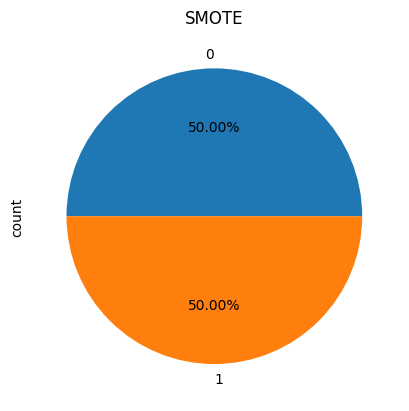

In [ ]:
ax = y_train_smote.value_counts().plot.pie(autopct='%1.2f%%')
_ = ax.set_title("SMOTE")

In [ ]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(666, 10)
(666,)


In [ ]:
# MODEL TRAINING

# Importing necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
# Train models

# Initialize model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train on the SMOTE-applied training data
logreg_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predict on test data (scaled)
y_pred_logreg = logreg_model.predict(X_test)

In [ ]:
# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70        83
           1       0.45      0.85      0.59        34

    accuracy                           0.65       117
   macro avg       0.68      0.71      0.64       117
weighted avg       0.77      0.65      0.66       117



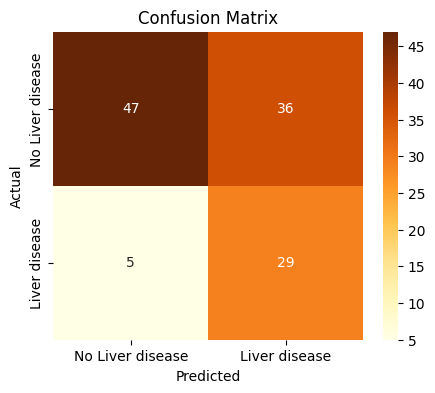

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=["No Liver disease", "Liver disease"], yticklabels=["No Liver disease", "Liver disease"])
#1 → 0 (disease), 2 → 1 (no disease)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 5-fold cross-validation
cv_scores = cross_val_score(logreg_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.67910448 0.7443609  0.71428571 0.72932331 0.7593985 ]
Mean CV Accuracy: 0.7252945797329143


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Train on SMOTE-balanced data
dt_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.66        83
           1       0.28      0.35      0.31        34

    accuracy                           0.55       117
   macro avg       0.49      0.49      0.49       117
weighted avg       0.58      0.55      0.56       117



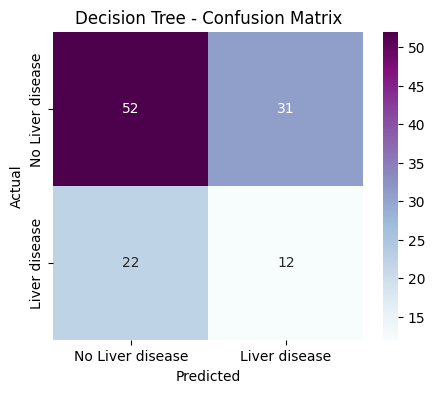

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu",
            xticklabels=["No Liver disease", "Liver disease"],
            yticklabels=["No Liver disease", "Liver disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [ ]:
cv_scores = cross_val_score(dt_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.69402985 0.67669173 0.77443609 0.76691729 0.81203008]
Mean CV Accuracy: 0.7448210077432387


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train on the SMOTE-applied training data
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        83
           1       0.39      0.47      0.43        34

    accuracy                           0.63       117
   macro avg       0.58      0.58      0.58       117
weighted avg       0.65      0.63      0.64       117



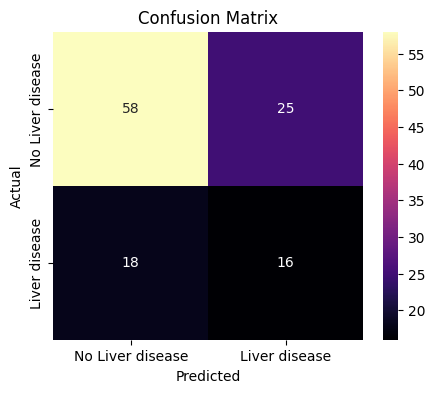

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=["No Liver disease", "Liver disease"], yticklabels=["No Liver disease", "Liver disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#True Negatives (TN)	56	Model correctly predicted "No Liver Disease"
#False Positives (FP)	27	Model predicted "Liver Disease", but actually it's "No"
#False Negatives (FN)	16	Model predicted "No Liver Disease", but actually it is liver disease
#True Positives (TP)	18	Model correctly predicted "Liver Disease"

In [ ]:
# 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.78358209 0.77443609 0.84962406 0.83458647 0.86466165]
Mean CV Accuracy: 0.8213780720457862


In [ ]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # You can change to 'roc_auc' if desired
    n_jobs=-1,                 # Use all available cores
    verbose=1
)

In [ ]:
# Fit GridSearchCV on the SMOTE-resampled training data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.8243743687577151


In [ ]:
# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report (Best RF):")
print(classification_report(y_test, y_pred_best_rf))

Classification Report (Best RF):
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        83
           1       0.40      0.50      0.44        34

    accuracy                           0.63       117
   macro avg       0.58      0.59      0.58       117
weighted avg       0.66      0.63      0.64       117



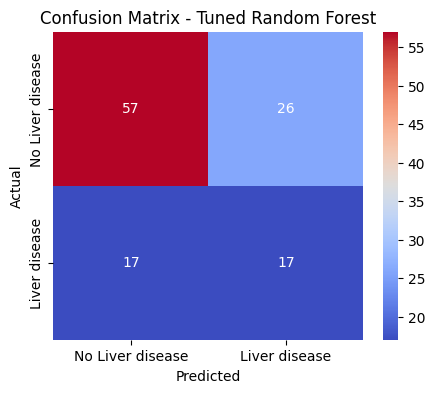

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=["No Liver disease", "Liver disease"],
            yticklabels=["No Liver disease", "Liver disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

In [ ]:
import os
import pickle

# Correct path: only the directory, not the file
models_dir = r'F:\vscode\Multiple Disease Prediction\models'

# Ensure the directory exists
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Full path to the model file
model_path = os.path.join(models_dir, "liver_best_rf_model.pkl")

# Save the model
with open(model_path, 'wb') as model_file:
    pickle.dump(best_rf, model_file)
    print("model saved successfully at:", model_path)

model saved successfully at: F:\vscode\Multiple Disease Prediction\models/liver_best_rf_model.pkl
